In [18]:
#import and install libraries
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#download stock data
tickers =['JPM', 'GS', 'BAC']
data = yf.download(tickers, start='2019-01-01', end='2024-12-31', group_by='ticker', auto_adjust=True, progress=False)

# Create a clean DataFrame of closing prices
adj_close = pd.DataFrame()

for ticker in tickers:
    adj_close[ticker] = data[ticker]['Close']  # use 'Close' if auto_adjust=True

# Preview it
print(adj_close.head())

                  JPM          GS        BAC
Date                                        
2019-01-02  82.408630  147.667694  21.290718
2019-01-03  81.237442  145.504562  20.949518
2019-01-04  84.232292  150.260025  21.819574
2019-01-07  84.290871  151.092636  21.802513
2019-01-08  84.131920  150.534653  21.759865


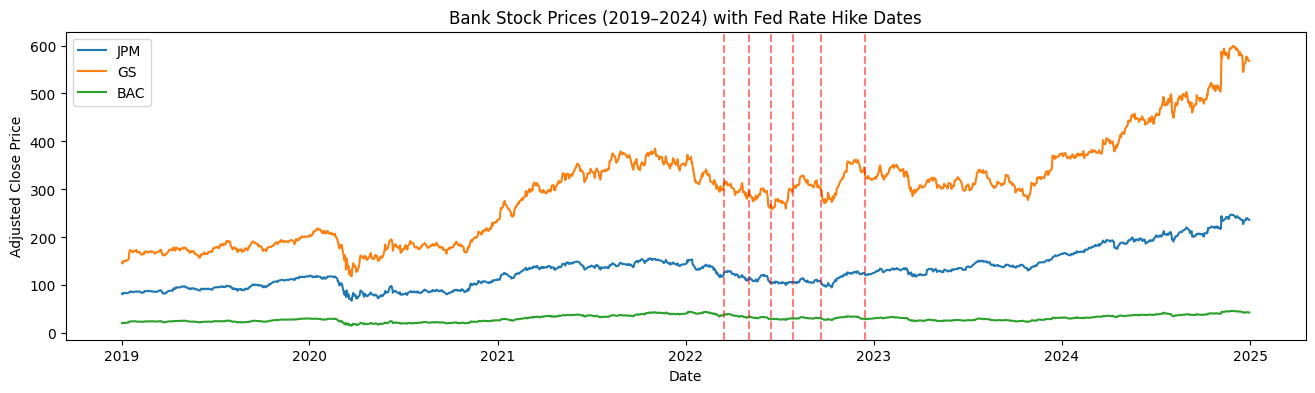

In [20]:
#plot stock price trends
rate_hikes=['2022-03-16', '2022-05-04', '2022-06-15', '2022-07-27', '2022-09-21','2022-12-14']
plt.figure(figsize=(16,4))
for t in tickers:
    plt.plot(adj_close[t], label=t)

for date in rate_hikes:
  plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.5)

plt.title("Bank Stock Prices (2019–2024) with Fed Rate Hike Dates")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()

Ticker  Price 
GS      Volume    7.065168
JPM     Volume    5.935648
BAC     Volume    5.478763
        Close     0.339771
        Open      0.333752
GS      Close     0.317226
JPM     Close     0.306620
GS      Open      0.302104
BAC     Low       0.301644
        High      0.299126
JPM     Open      0.287865
GS      Low       0.276230
        High      0.275441
JPM     High      0.269639
        Low       0.267115
dtype: float64


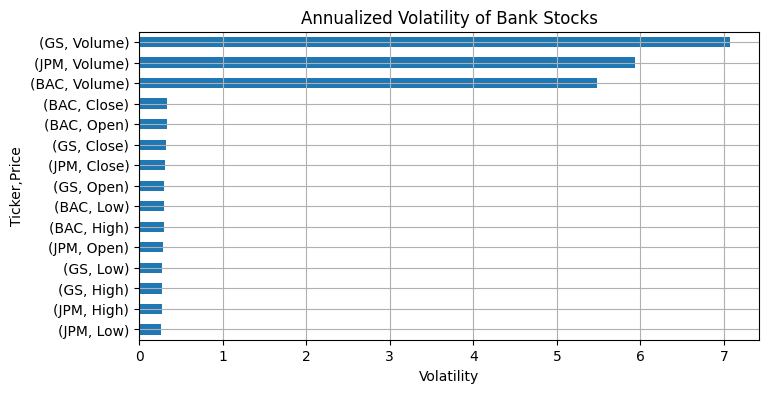

In [21]:
returns = data.pct_change()

# Annualized volatility (std dev * sqrt of 252 trading days)
volatility = returns.std() * (252 ** 0.5)
print(volatility.sort_values(ascending=False))
volatility.sort_values().plot(kind='barh', figsize=(8,4), title='Annualized Volatility of Bank Stocks')
plt.xlabel("Volatility")
plt.grid(True)
plt.show()

In [22]:
#function to investigate pre vs post hikes impact
def get_return_around_event(series, event_date, window=5):
    event = pd.to_datetime(event_date)
    series = series.copy()
    series.index = pd.to_datetime(series.index)

    # Use get_indexer with method='nearest'
    before_idx = series.index.get_indexer([event - pd.Timedelta(days=window)], method='nearest')[0]
    after_idx = series.index.get_indexer([event + pd.Timedelta(days=window)], method='nearest')[0]

    before = series.iloc[before_idx]
    after = series.iloc[after_idx]

    return ((after - before) / before) * 100
for date in rate_hikes:
    ret = get_return_around_event(adj_close['JPM'], date)
    print(f"JPM return around {date}: {ret:.2f}%")
  # example if ret is a dict or Series


JPM return around 2022-03-16: 8.35%
JPM return around 2022-05-04: 2.09%
JPM return around 2022-06-15: -3.11%
JPM return around 2022-07-27: -0.48%
JPM return around 2022-09-21: -8.79%
JPM return around 2022-12-14: -1.59%


In [23]:
data.to_csv("bank_prices.csv")
returns.to_csv("bank_returns.csv") #export to CSV for PowerBI

In [24]:
correlation = returns[['JPM', 'GS', 'BAC']].corr()
correlation.style.background_gradient(cmap='coolwarm', axis=None)